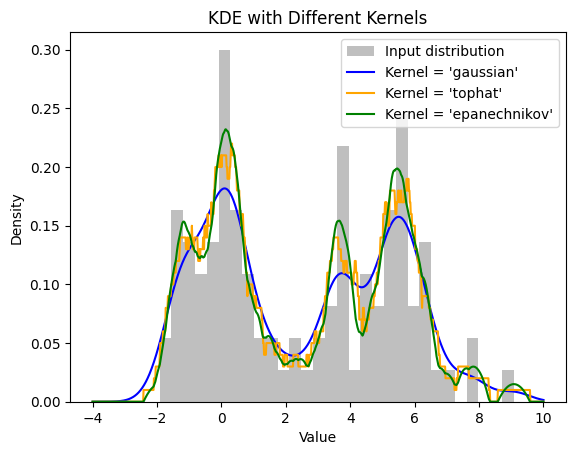

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate sample data: two Gaussian distributions
# np.random.seed(42)
n_samples = 100
data1 = np.random.normal(loc=0, scale=1, size=n_samples//2)  # Gaussian 1 (mu=0, sigma=1)
data2 = np.random.normal(loc=5, scale=1.5, size=n_samples//2)  # Gaussian 2 (mu=5, sigma=1.5)
data = np.concatenate([data1, data2])  # Combine the datasets

# Create a range of values for KDE
x = np.linspace(-4, 10, 1000).reshape(-1, 1)  # Evaluation points

# Define kernels for KDE
kernels = ['gaussian', 'tophat', 'epanechnikov']
colors = ['blue', 'orange', 'green']

# Plot original histogram
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Input distribution')

# Perform KDE with different kernels
for kernel, color in zip(kernels, colors):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(data.reshape(-1, 1))  # Fit KDE
    log_dens = kde.score_samples(x)  # Calculate log density
    plt.plot(x, np.exp(log_dens), label=f"Kernel = '{kernel}'", color=color)

# Finalize plot
plt.title("KDE with Different Kernels")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()
